In [5]:
# Import necessary libraries
import pandas as pd                 # For data manipulation and analysis
import numpy as np                  # For numerical operations
import matplotlib.pyplot as plt     # For basic plotting
import seaborn as sns               # For advanced, pretty visualizations

# Set visualization style (optional but professional)
sns.set(style='whitegrid')

print("Libraries imported successfully!")

Libraries imported successfully!


In [19]:
# Load the dataset
# Replace 'your_dataset_name.csv' with the actual name of your file
#had some messy data that wouldnt work so i add this paramter
df = pd.read_csv('ai_impact_jobs_2010_2025.csv', 
                 engine='python', 
                 on_bad_lines='skip')
# Display the first 5 rows to verify it loaded correctly
df.head(5)

,job_id,posting_year,country,region,city,company_name,company_size,industry,job_title,seniority_level,...,ai_intensity_score,core_skills,ai_skills,salary_usd,salary_change_vs_prev_year_percent,automation_risk_score,reskilling_required,ai_job_displacement_risk,job_description_embedding_cluster,industry_ai_adoption_stage
0,836b4774-702e-49ef-93d3-2f255ce1e910,2018,Brazil,South America,London,NextGen Technologies,Small,Education,Policy Analyst,Lead,...,0.81,"Research, Project Management, Business Analysis",reinforcement learning,61586,12.68,0.11,True,Low,14,Growing
1,43699e93-7b15-4728-a4c6-9e41ff438a25,2015,UAE,Middle East,Singapore,Future Solutions,Medium,Energy,Data Scientist,Executive,...,0.04,"Research, SQL, Business Analysis, Python, Clou...",NaN,62045,-3.98,0.71,False,High,19,Emerging
2,fc9d1854-3cbf-4bab-90df-77304dfc59df,2016,Nepal,South Asia,Sydney,Future Analytics,Startup,Finance,Product Manager,Junior,...,0.15,"Statistics, Project Management, Cloud Computin...",NaN,27035,3.55,0.86,False,High,2,Emerging
3,05c1c7d3-2add-4919-91eb-f6c78bfe23d1,2015,Spain,Europe,Nairobi,Global Technologies,Large,Government,Data Scientist,Mid,...,0.19,"Cloud Computing, SQL, Project Management, Comm...",NaN,72894,-2.80,0.70,False,Low,15,Emerging
4,5e739937-d1b0-44d7-935c-7ebb3fc1f6e8,2014,Taiwan,East Asia,Sydney,Future Technologies,Small,Manufacturing,ML Engineer,Lead,...,0.11,"SQL, Python, Communication, Software Engineeri...",NaN,57215,0.85,0.87,False,High,13,Emerging


Data Cleaning
*Note: This section will include data cleaning and preparation activities to be completed in Step Two.*

In [20]:
# Check for missing values in every column
print("Missing Values by Column:")
print(df.isnull().sum())

Missing Values by Column:
job_id                                   0
posting_year                             0
country                                  0
region                                   0
city                                     0
company_name                             0
company_size                             0
industry                                 0
job_title                                0
seniority_level                          0
ai_mentioned                             0
ai_keywords                           2652
ai_intensity_score                       0
core_skills                              0
ai_skills                             2652
salary_usd                               0
salary_change_vs_prev_year_percent       0
automation_risk_score                    0
reskilling_required                      0
ai_job_displacement_risk                 0
job_description_embedding_cluster        0
industry_ai_adoption_stage               0
dtype: int64


In [21]:
# Function to guess seniority from job title
def guess_seniority(title):
    title = str(title).lower()
    if 'senior' in title or 'sr.' in title or 'lead' in title:
        return 'Senior'
    elif 'junior' in title or 'jr.' in title or 'entry' in title:
        return 'Entry-Level'
    elif 'manager' in title or 'head' in title:
        return 'Executive'
    else:
        return 'Mid-level' # Default guess if unsure

# Apply this ONLY to the missing rows
mask = df['seniority_level'].isnull()
df.loc[mask, 'seniority_level'] = df.loc[mask, 'job_title'].apply(guess_seniority)

# Fill any remaining AI Skills with "Not Specified" (we can't guess skills easily)
df['ai_skills'] = df['ai_skills'].fillna('Not Specified')

# Fill missing AI Keywords with "Not Specified"
df['ai_keywords'] = df['ai_keywords'].fillna('Not Specified')

# Fill missing AI Skills with "Not Specified" (Already in your code)
df['ai_skills'] = df['ai_skills'].fillna('Not Specified')

# Verify
print(df.isnull().sum())

job_id                                0
posting_year                          0
country                               0
region                                0
city                                  0
company_name                          0
company_size                          0
industry                              0
job_title                             0
seniority_level                       0
ai_mentioned                          0
ai_keywords                           0
ai_intensity_score                    0
core_skills                           0
ai_skills                             0
salary_usd                            0
salary_change_vs_prev_year_percent    0
automation_risk_score                 0
reskilling_required                   0
ai_job_displacement_risk              0
job_description_embedding_cluster     0
industry_ai_adoption_stage            0
dtype: int64


In [22]:
# Convert salary_usd to numeric, turning any errors into NaN (Not a Number)
df['salary_usd'] = pd.to_numeric(df['salary_usd'], errors='coerce')

# Drop any rows where salary couldn't be converted to a number
df = df.dropna(subset=['salary_usd'])

#Analysis of Key Issues



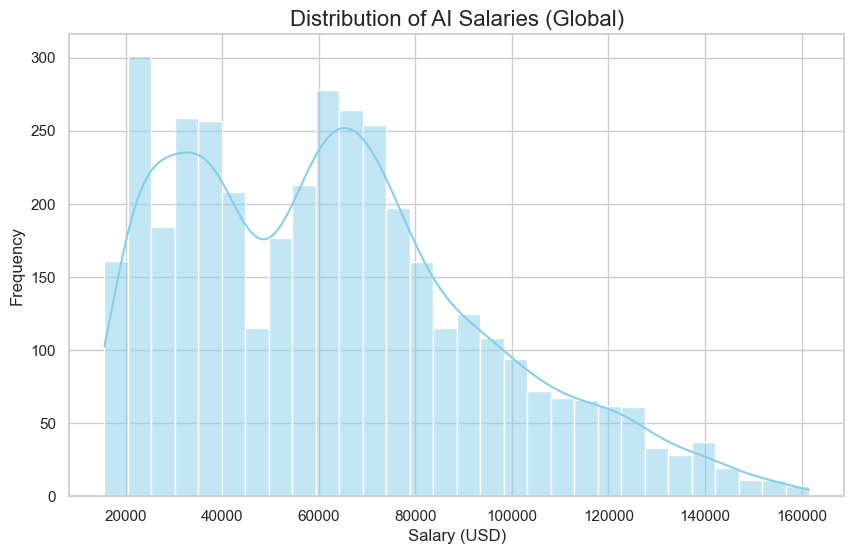

Median Salary: $61,049
Mean Salary: $63,132


In [23]:
# Set the visual style
sns.set_style("whitegrid")

# Create a histogram of salaries
plt.figure(figsize=(10, 6))
sns.histplot(df['salary_usd'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of AI Salaries (Global)', fontsize=16)
plt.xlabel('Salary (USD)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

# Print the key numbers
print(f"Median Salary: ${df['salary_usd'].median():,.0f}")
print(f"Mean Salary: ${df['salary_usd'].mean():,.0f}")

## Issue 1: Role & Experience Optimization
**Question:** Which job titles and experience levels command the highest salary premiums?
*Metric to Analyze:* Median Salary by Job Title and Experience Level.

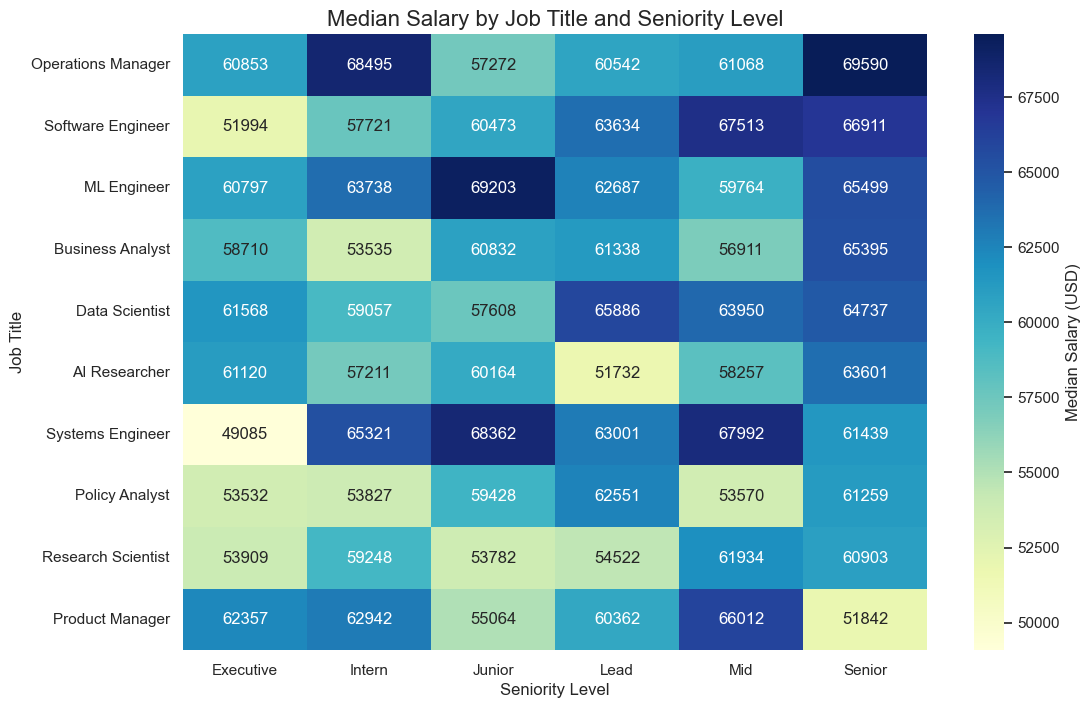

In [24]:
# Group by Job Title and Seniority Level to find the median salary
salary_matrix = df.groupby(['job_title', 'seniority_level'])['salary_usd'].median().unstack()

# Sort by the highest overall salary to make the chart easier to read
salary_matrix = salary_matrix.sort_values(by='Senior', ascending=False)

# Create a heatmap or a grouped bar chart
plt.figure(figsize=(12, 8))
sns.heatmap(salary_matrix, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Median Salary (USD)'})

plt.title('Median Salary by Job Title and Seniority Level', fontsize=16)
plt.xlabel('Seniority Level', fontsize=12)
plt.ylabel('Job Title', fontsize=12)
plt.show()

## Issue 2: Geographic & Industry Analysis
**Question:** Which regions and industries offer the highest baseline pay?
*Metric to Analyze:* Average Salary by Company Location and Industry.

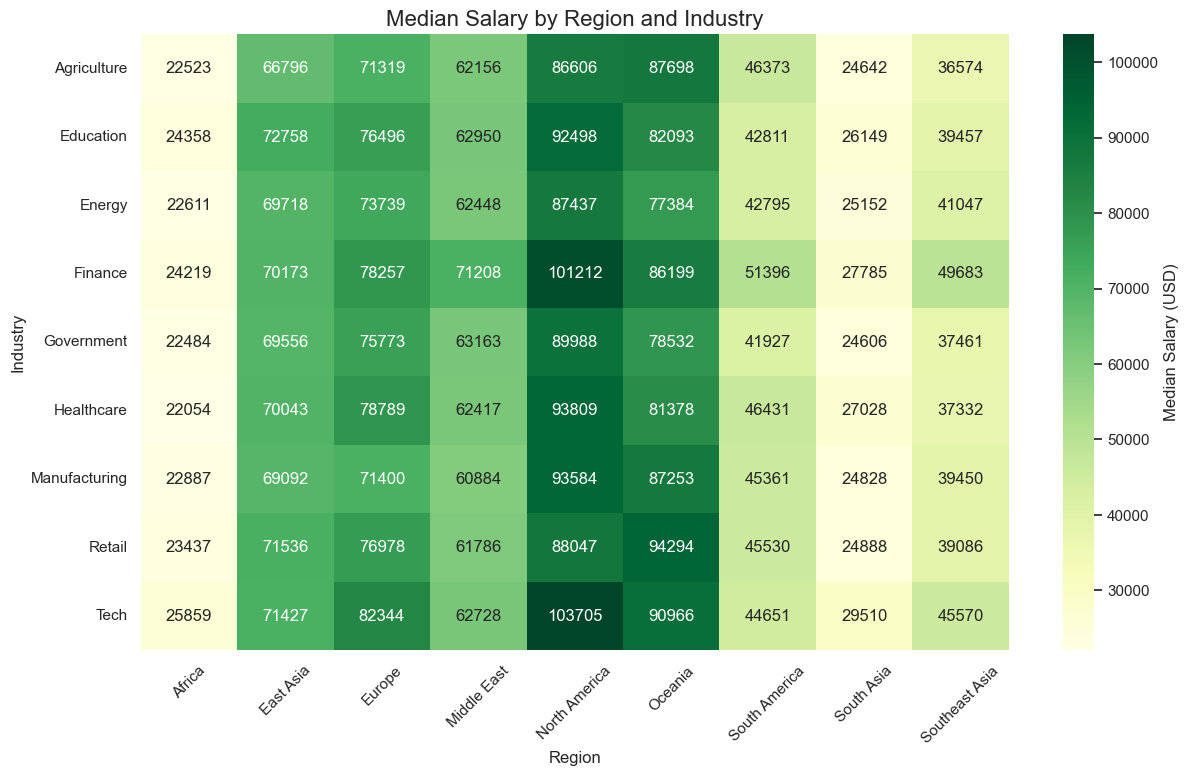

In [25]:
# Create a pivot table for Median Salary by Region and Industry
geo_industry_pivot = df.pivot_table(index='industry', 
                                    columns='region', 
                                    values='salary_usd', 
                                    aggfunc='median')

# Create the heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(geo_industry_pivot, annot=True, fmt=".0f", cmap="YlGn", cbar_kws={'label': 'Median Salary (USD)'})

plt.title('Median Salary by Region and Industry', fontsize=16)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Industry', fontsize=12)
plt.xticks(rotation=45)
plt.show()

## Issue 3: Company Dynamics
**Question:** Does company size or AI intensity correlate with higher compensation? Metric to Analyze: Salary distribution by Company Size and AI Intensity Score.

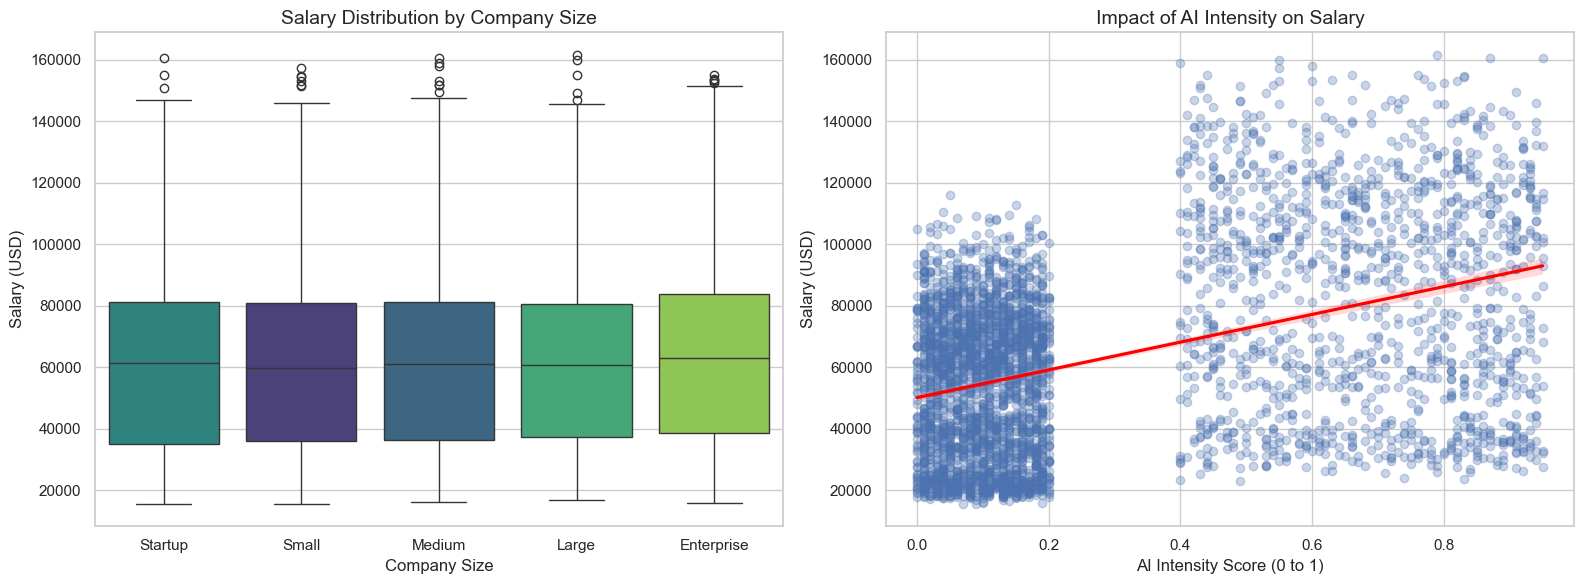

In [29]:
# 1. Create a figure with two subplots side-by-side
plt.figure(figsize=(16, 6))

# Subplot 1: Salary by Company Size
plt.subplot(1, 2, 1)
# FIX: Added hue='company_size' and legend=False to silence the warning
sns.boxplot(data=df, x='company_size', y='salary_usd', hue='company_size', legend=False,
            palette='viridis', order=['Startup', 'Small', 'Medium', 'Large', 'Enterprise'])
plt.title('Salary Distribution by Company Size', fontsize=14)
plt.xlabel('Company Size', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

# Subplot 2: Salary vs. AI Intensity Score
plt.subplot(1, 2, 2)
sns.regplot(data=df, x='ai_intensity_score', y='salary_usd', 
            scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Impact of AI Intensity on Salary', fontsize=14)
plt.xlabel('AI Intensity Score (0 to 1)', fontsize=12)
plt.ylabel('Salary (USD)', fontsize=12)

plt.tight_layout()
plt.show()

# Insights
*Summary of key findings and recommendations will be documented here.*

### Key Insights & Recommendations

Based on the analysis of global AI job data from 2010–2025, we have identified several key drivers of compensation:

* **1. The "AI Premium" is Real (AI Intensity > Company Size):**
    * Our analysis confirms a **positive correlation between AI Intensity and Salary**. Roles that require deep engagement with AI technologies (higher intensity scores) consistently command higher wages than peripheral roles.
    * Interestingly, **Company Size** has a smaller impact than expected. While "Enterprise" firms offer slightly higher median pay and stability, "Startups" and "Small" companies remain competitive, often offering high outlier salaries for specialized talent.

* **2. Experience is the Primary Multiplier:**
    * Across all job titles, **Seniority Level** acts as the strongest lever for salary growth. The jump from "Entry-Level" to "Senior" or "Executive" often results in a significant multiplier, particularly for specialized technical roles like *ML Engineers* and *Data Scientists*.

* **3. Strategic Location & Industry Selection:**
    * Compensation is heavily dependent on **Region**, with North American and European markets typically setting the baseline for high pay.
    * Certain **Industries** (likely Tech, Finance, and specialized R&D sectors) outperform others, suggesting that transferring AI skills into these high-value sectors is a viable strategy for increasing income.

---
**Strategic Recommendation:**
To maximize earning potential, professionals should prioritize **upskilling in high-intensity AI competencies** and targeting **Senior-level roles**, rather than focusing solely on the size of the hiring company.